In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
masks = np.stack(list(map(lambda index: np.load(f'../data/masks_train/mask_{index:03d}.npy'), range(40))))
indices_train = np.load('../data/indices_train.npy')

In [13]:
def plot_masks(array: np.ndarray, num_rows: int, num_cols: int, fig_size_factor=20, out_file = None):
    """Generates a single image from multiple numpy arrays which are interpreted as images."""

    assert min(num_rows, num_cols) > 0, "num_rows and num_cols has to be greater than zero."
    assert num_rows*num_cols == array.shape[0], "num_rows*num_cols must equal the length of the array."

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_size_factor, fig_size_factor*(num_rows/num_cols)))

    if min(num_rows, num_cols) == 1:
        [axes[i].scatter(
            indices_train[indices_train[:, 0] == i, 3], 
            indices_train[indices_train[:, 0] == i, 2], 
            c='g', s=2) for i in range(max(num_rows, num_cols))]

    else:
        for i in range(num_rows):
            for j in range(num_cols):
                axes[i,j].scatter(
                    indices_train[indices_train[:, 0] == i*num_cols+j, 3], 
                    indices_train[indices_train[:, 0] == i*num_cols+j, 2], 
                    c='g', s=2)

    # Do not show axes of subplots
    for ax in axes.reshape(-1):
        # ax.axis('off')
        
        # Remove the ticks
        ax.set_xticks([])
        ax.set_yticks([])

        ax.set_xlim([0, 1024])
        ax.set_ylim([0, 1024])
        ax.invert_yaxis()

    # Less spacing between patches
    fig.tight_layout()

    # Save the example patches
    if out_file is not None:
        plt.savefig(out_file)

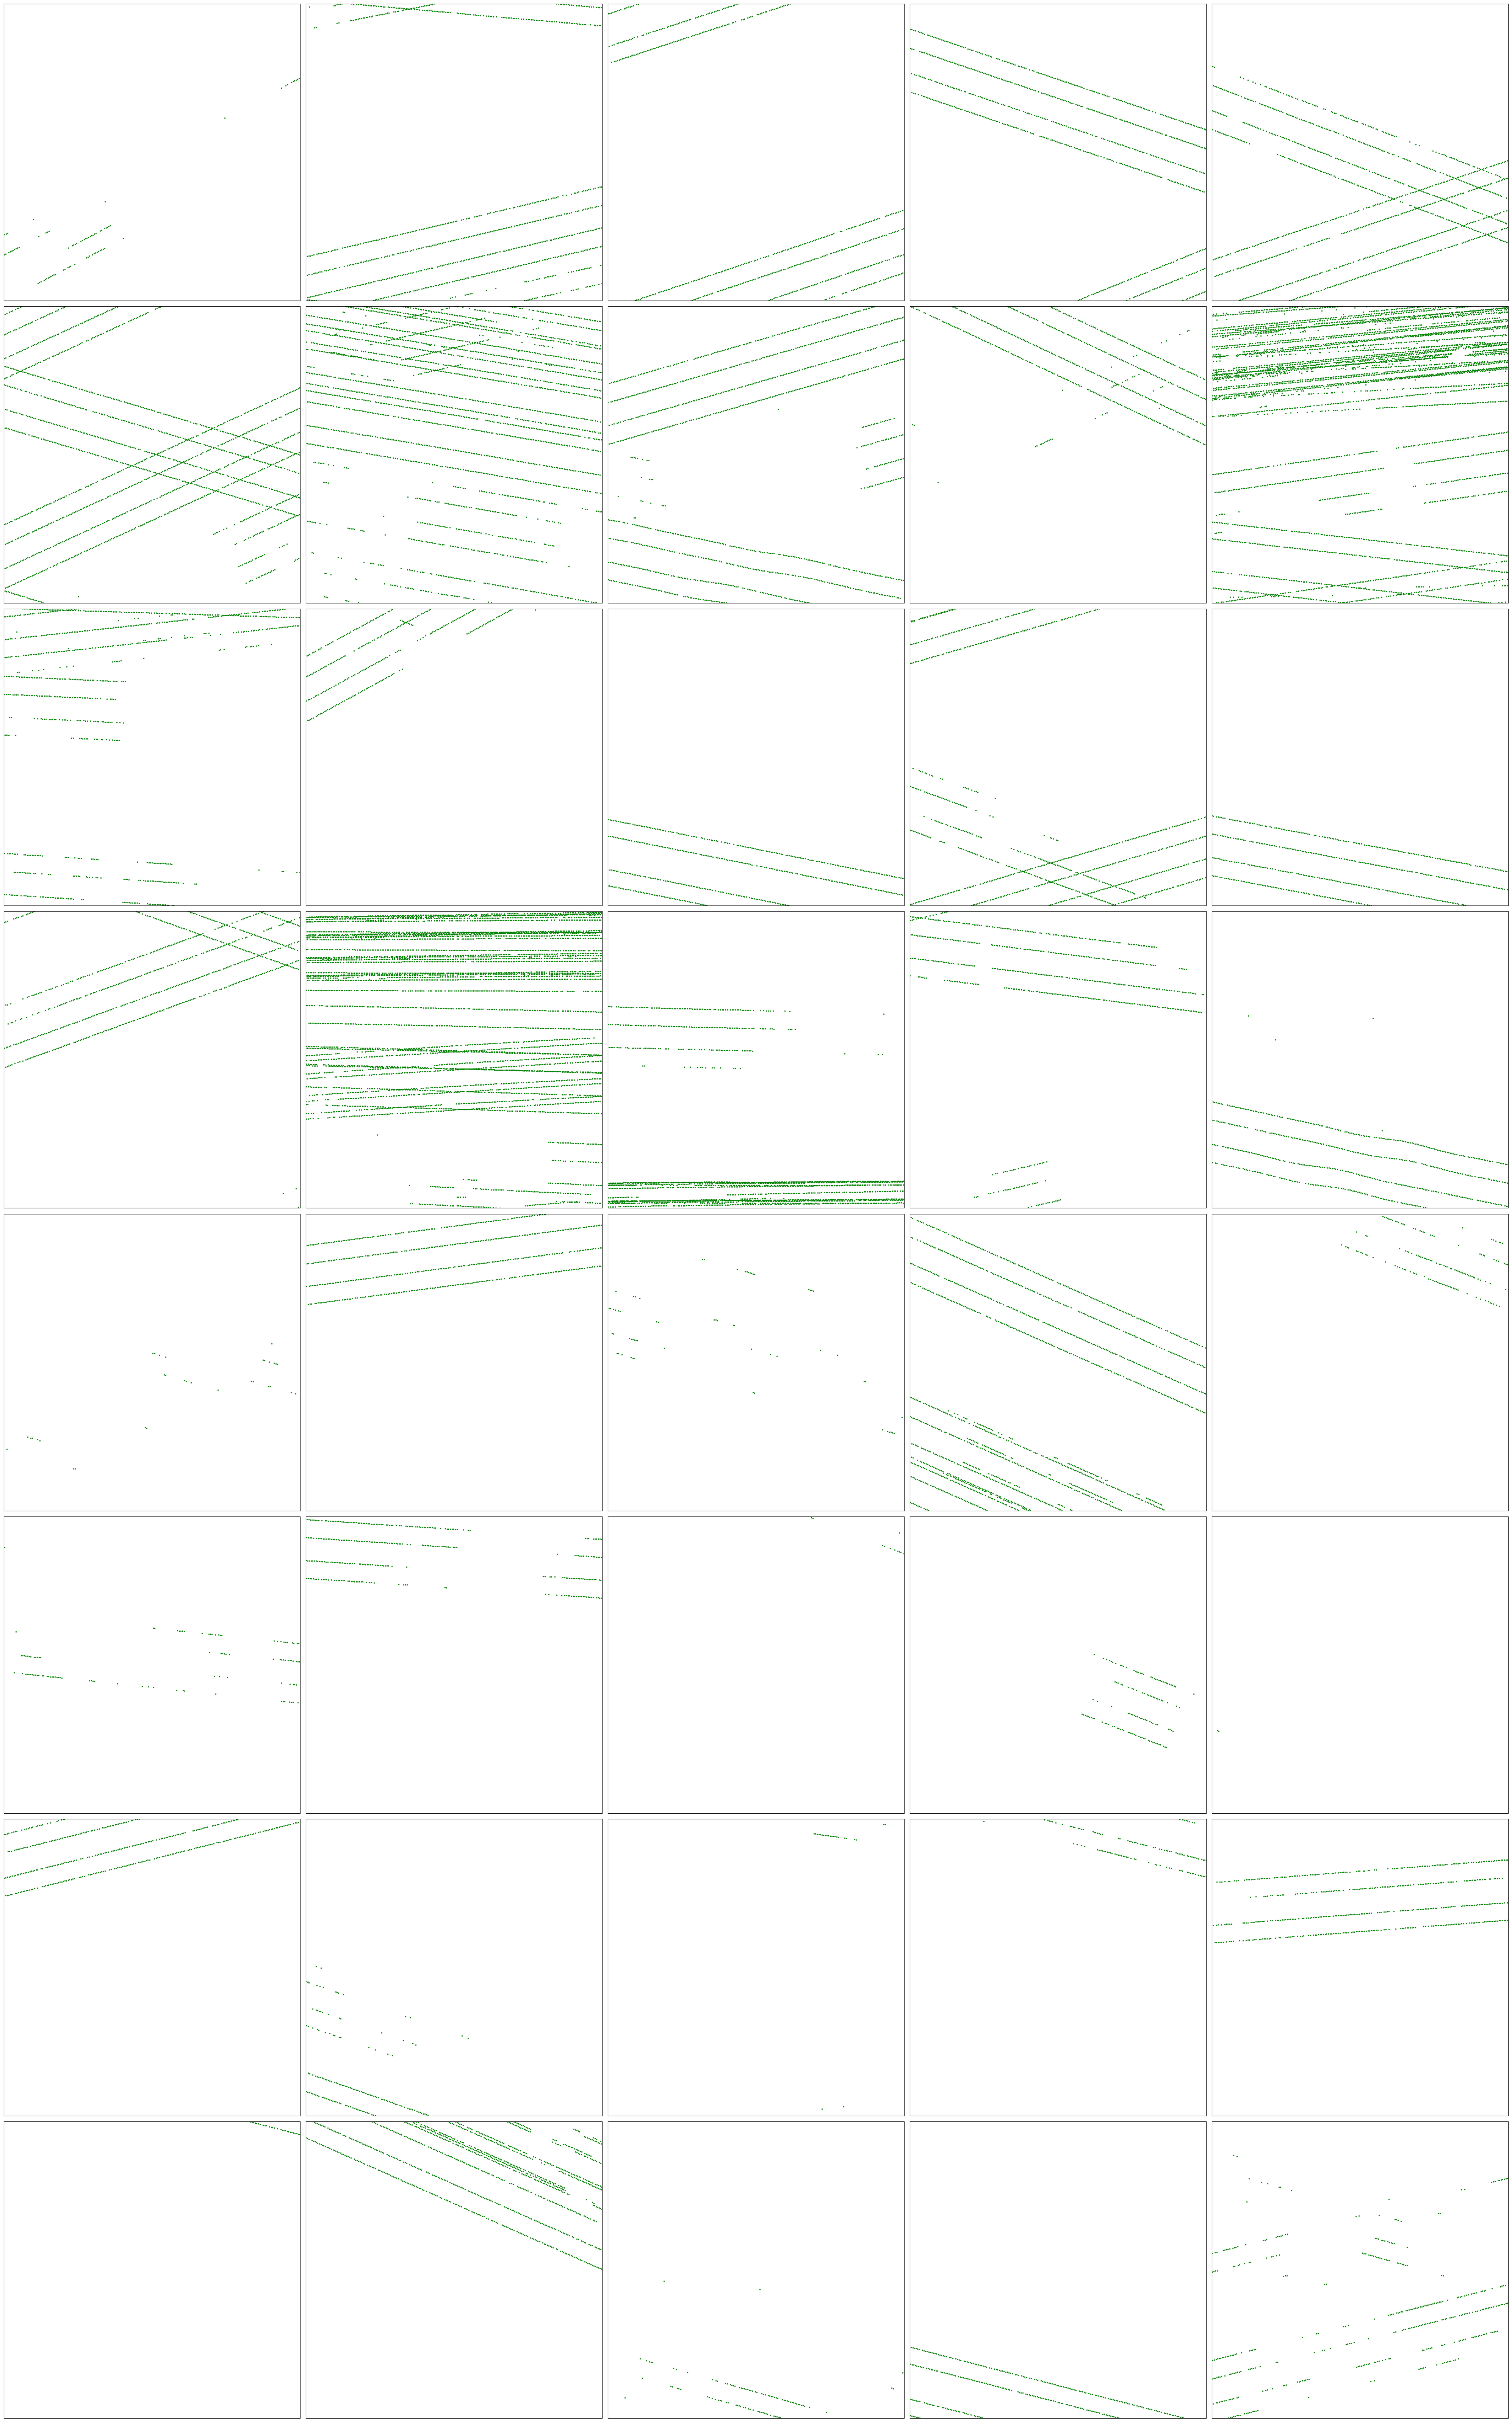

In [14]:
plot_masks(masks, 8, 5, 40)

[]

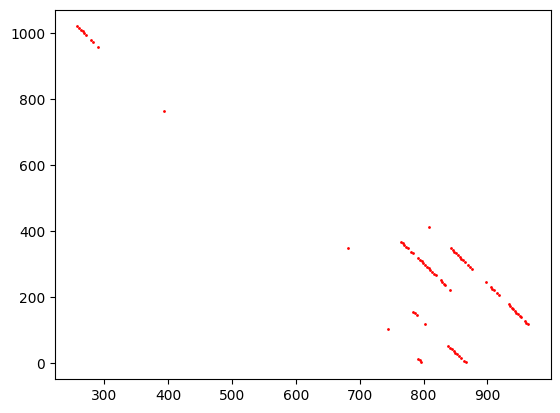

In [17]:
plt.scatter(indices_train[indices_train[:, 0] == 0, 2], 
    indices_train[indices_train[:, 0] == 0, 3], 
    c='r', s=1)
plt.plot()

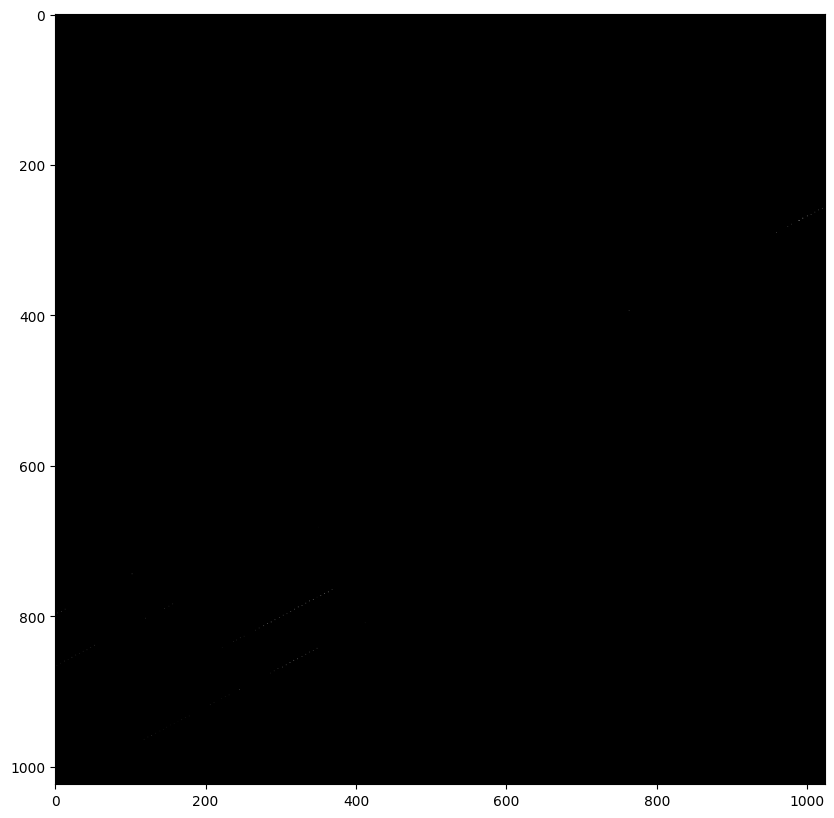

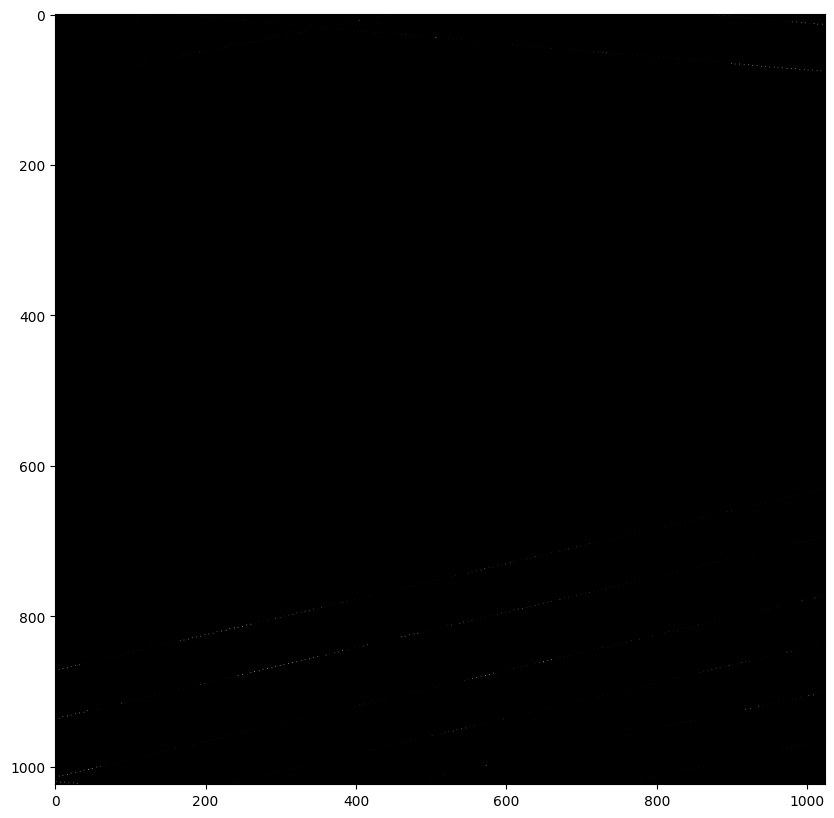

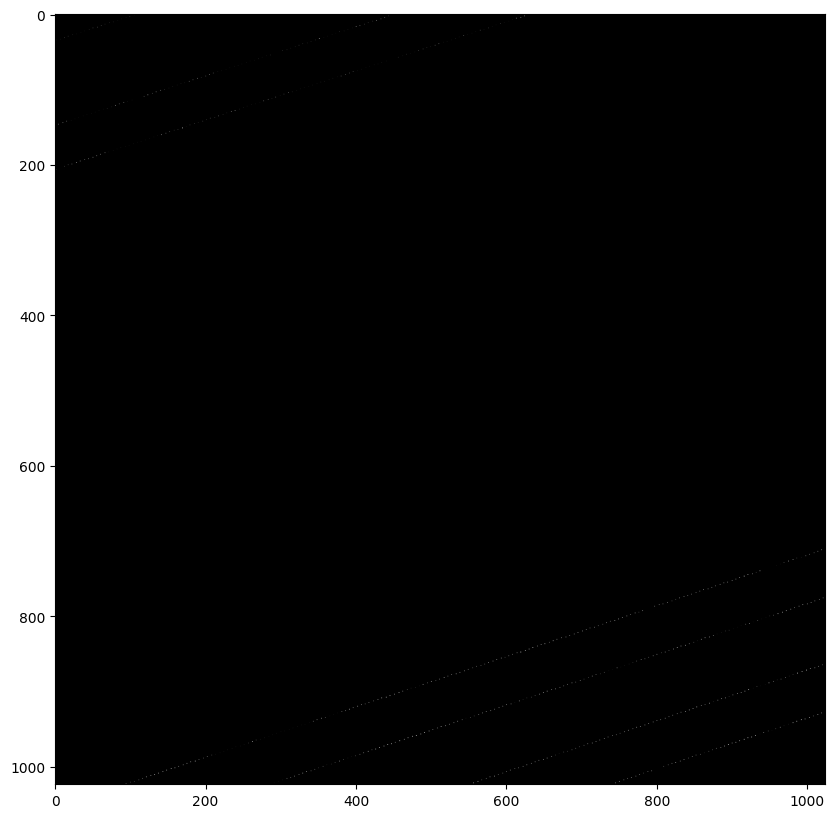

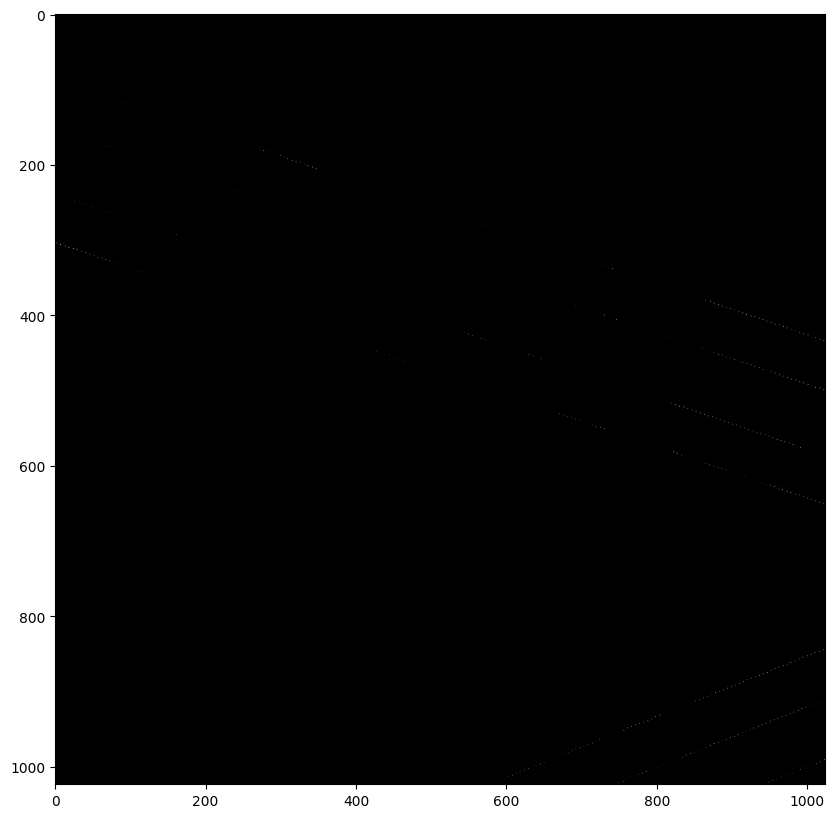

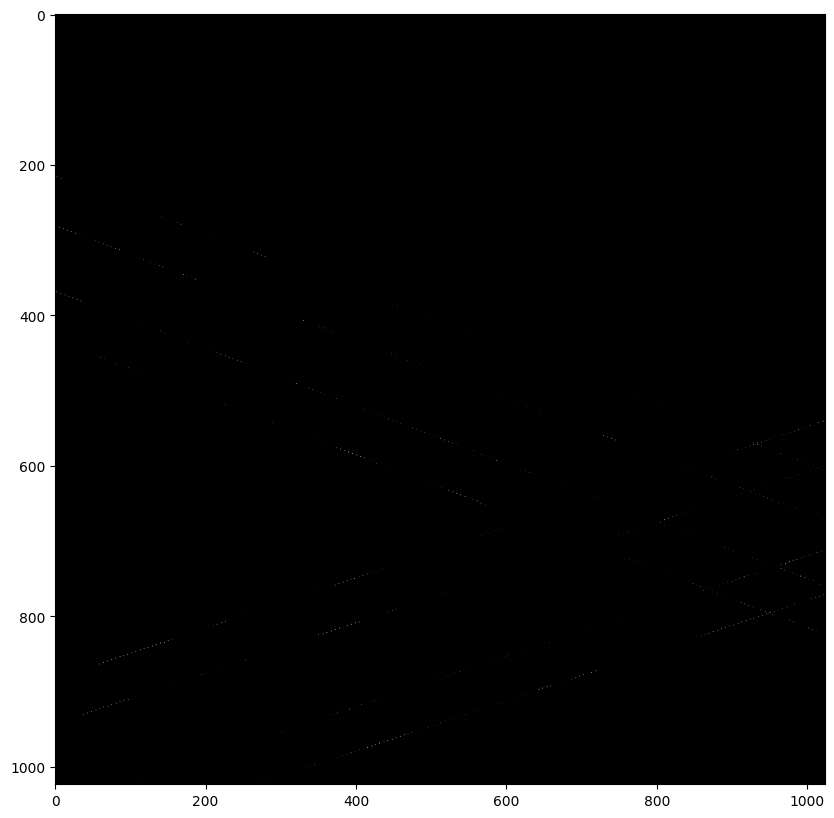

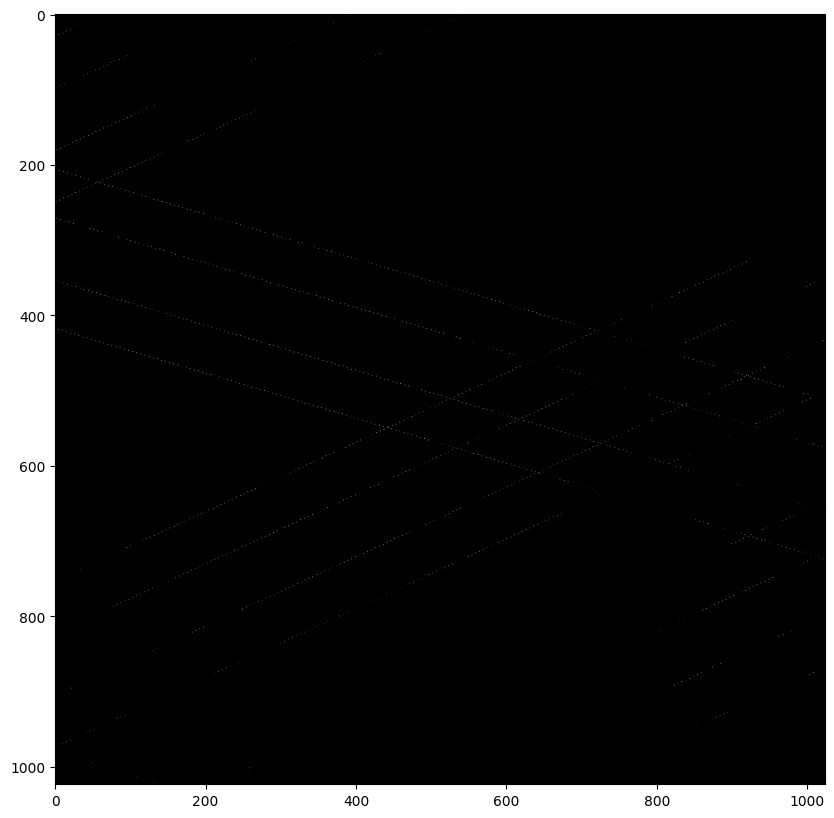

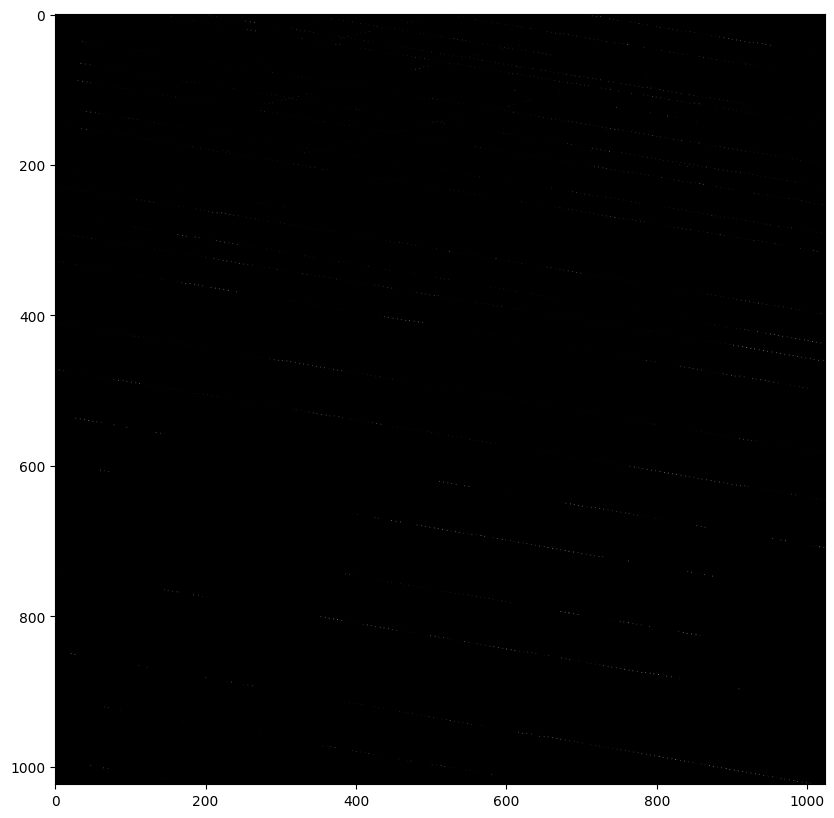

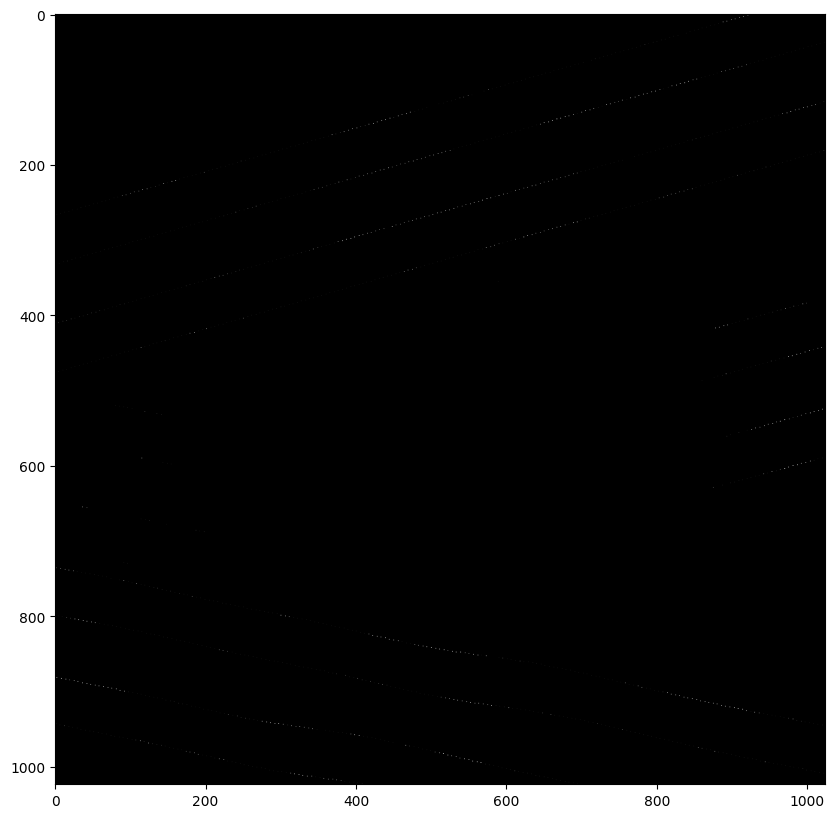

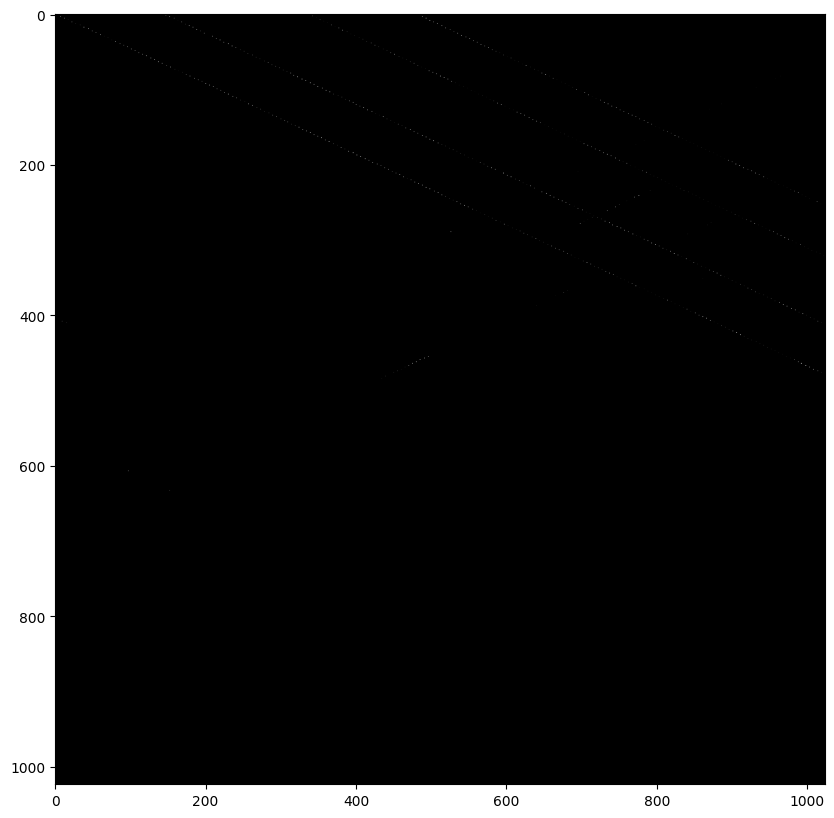

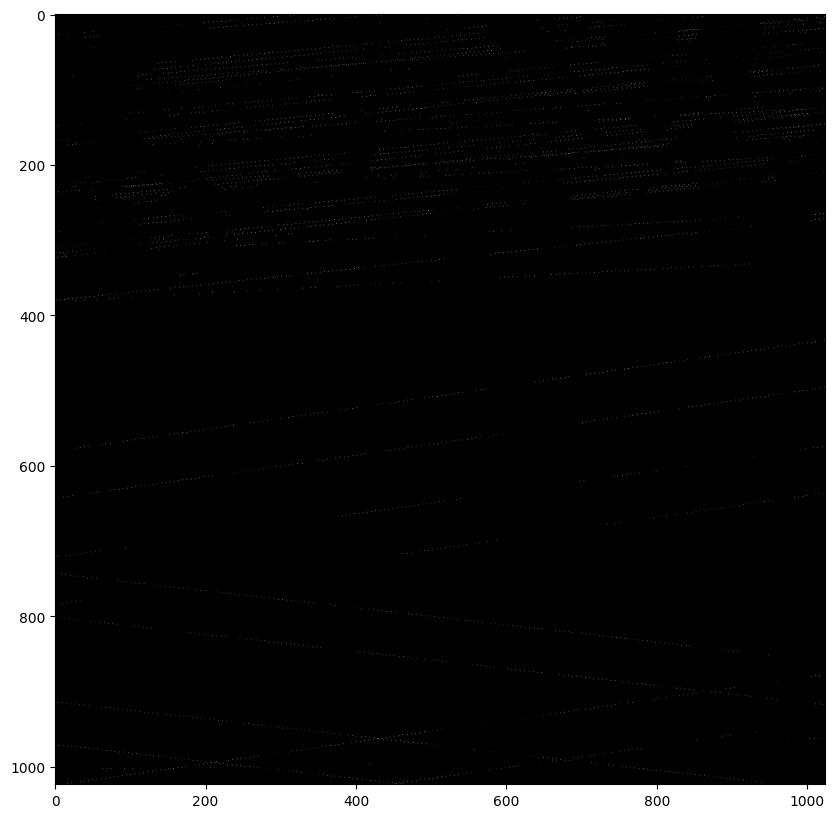

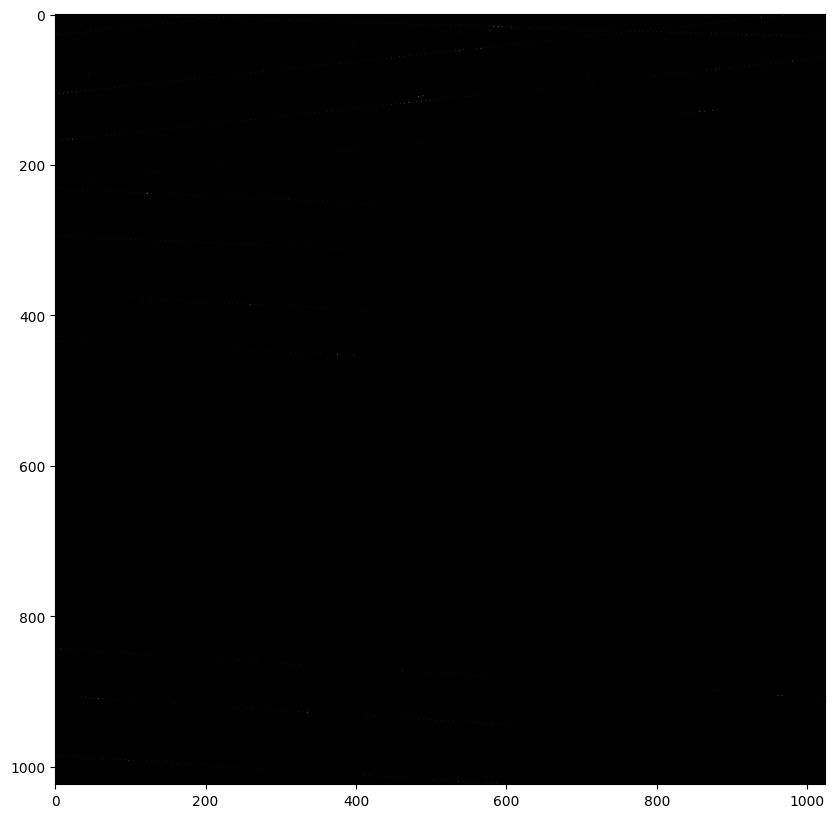

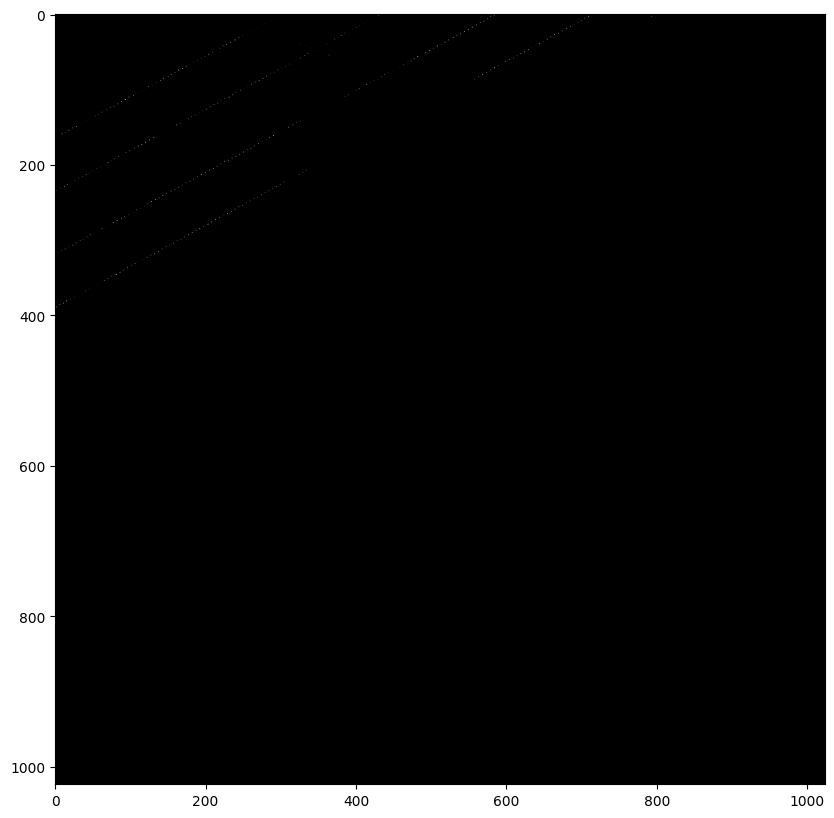

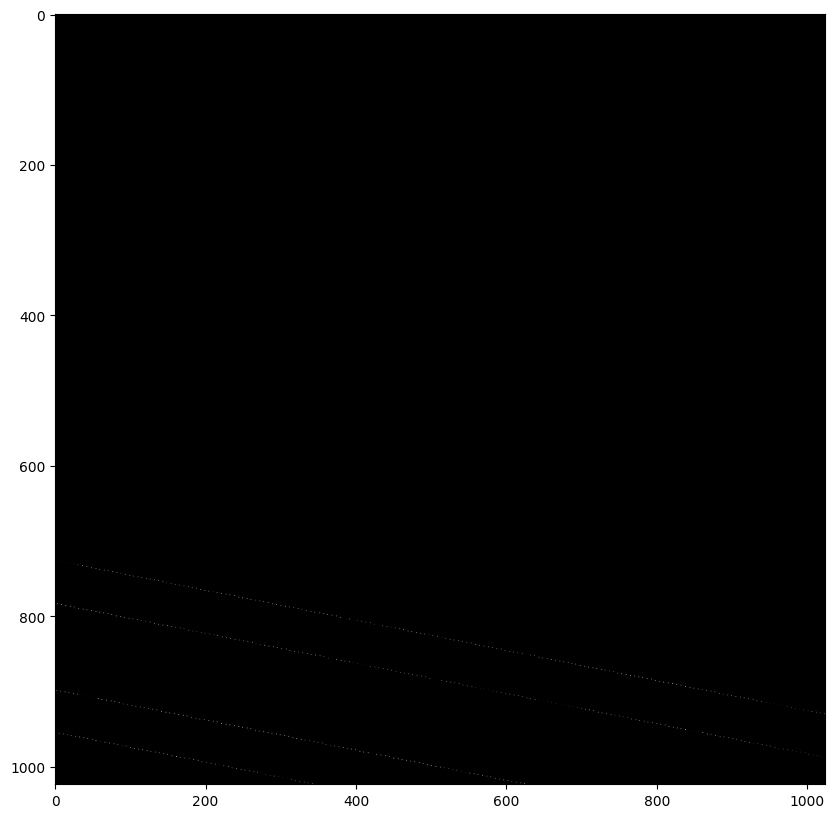

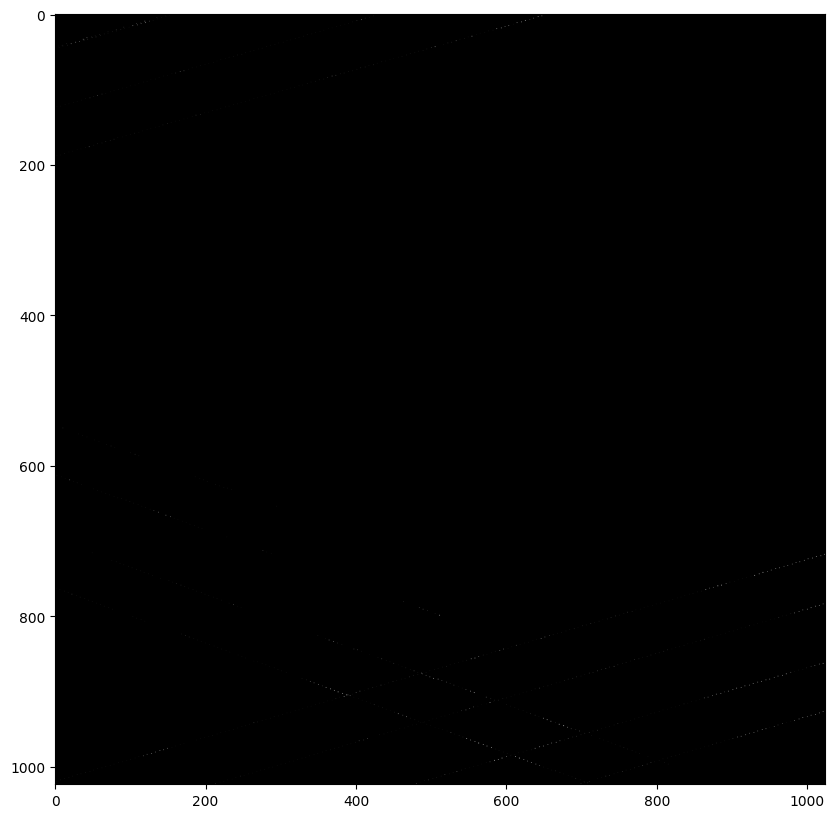

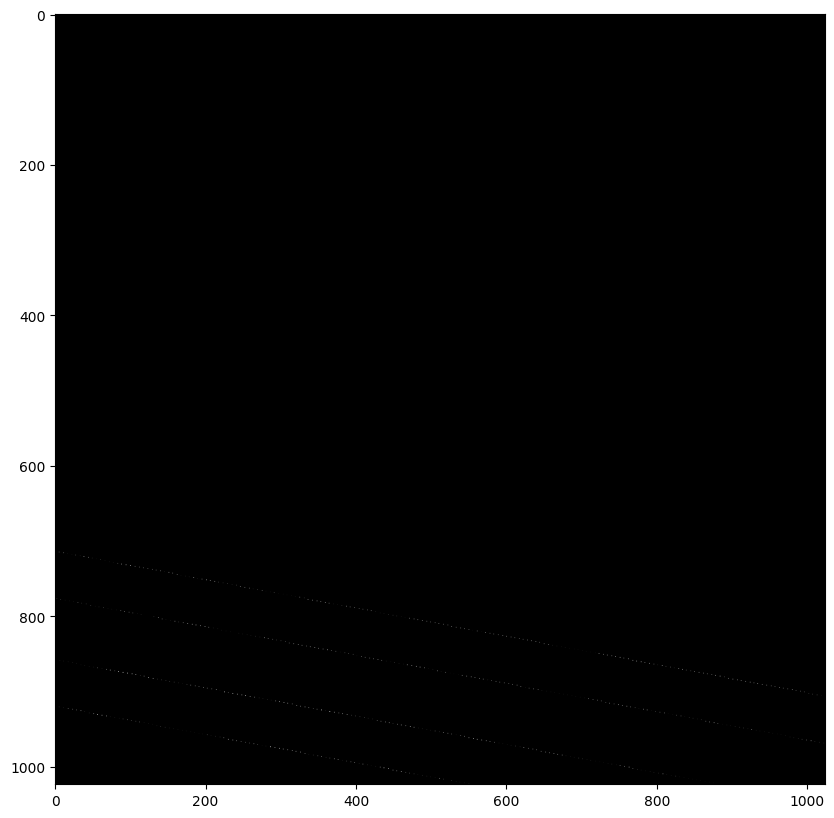

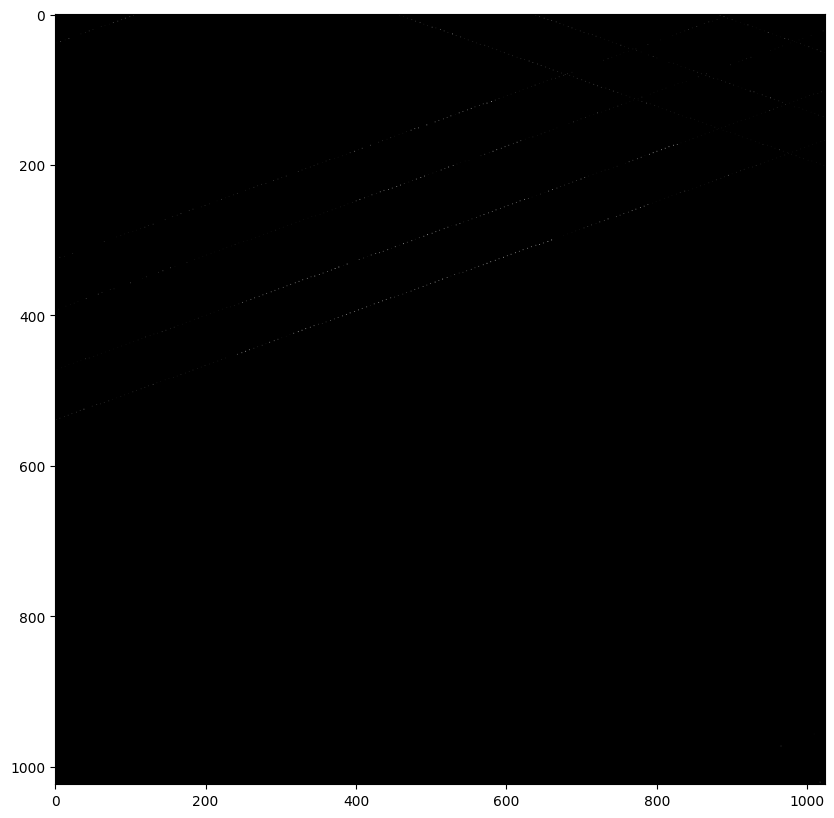

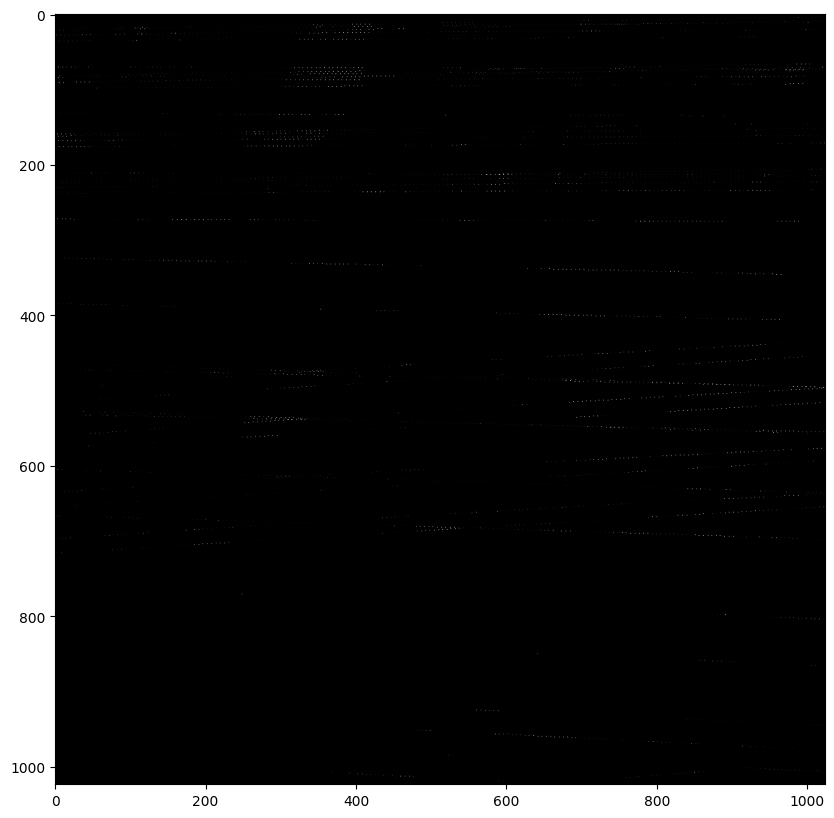

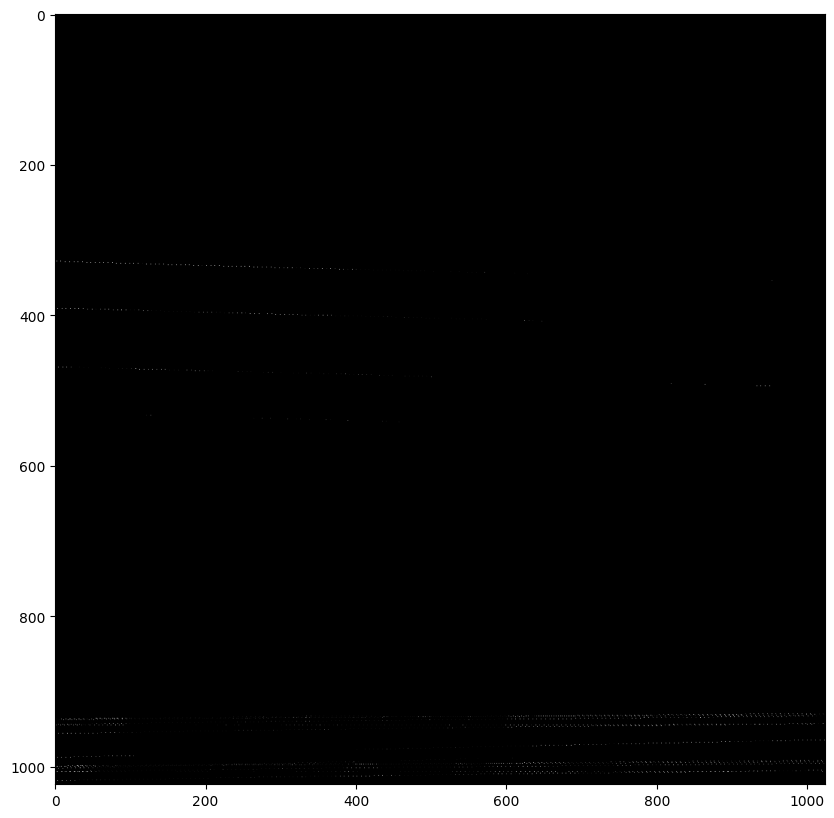

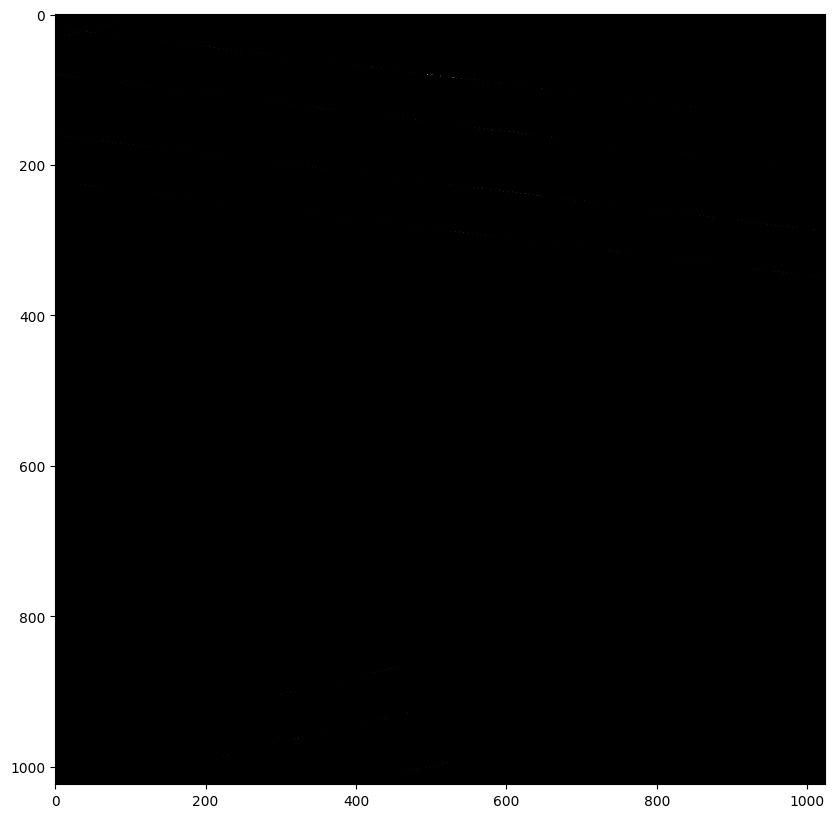

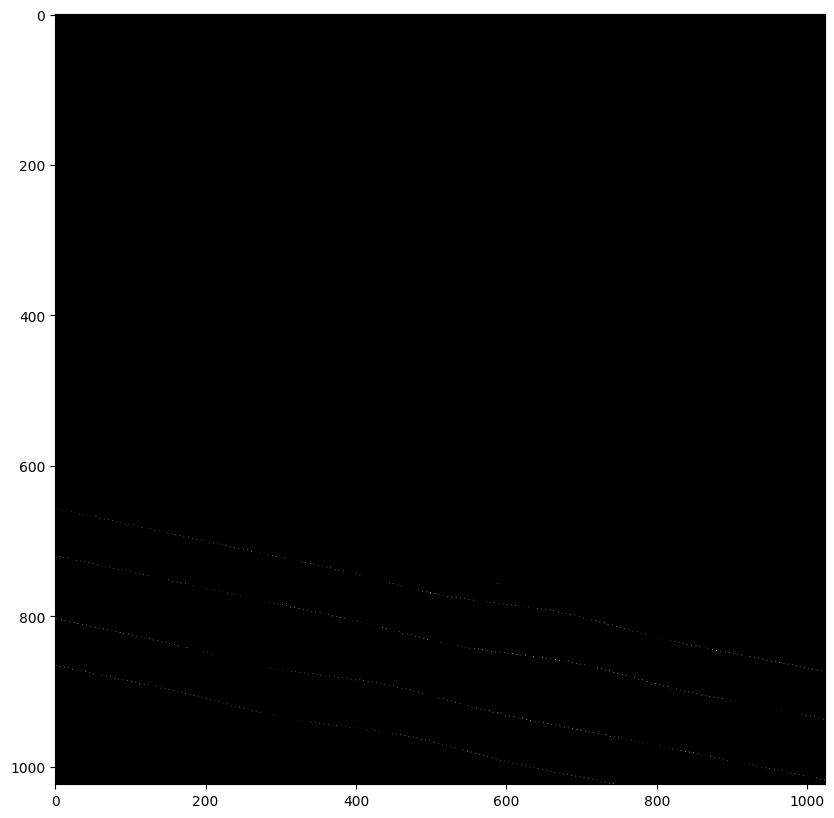

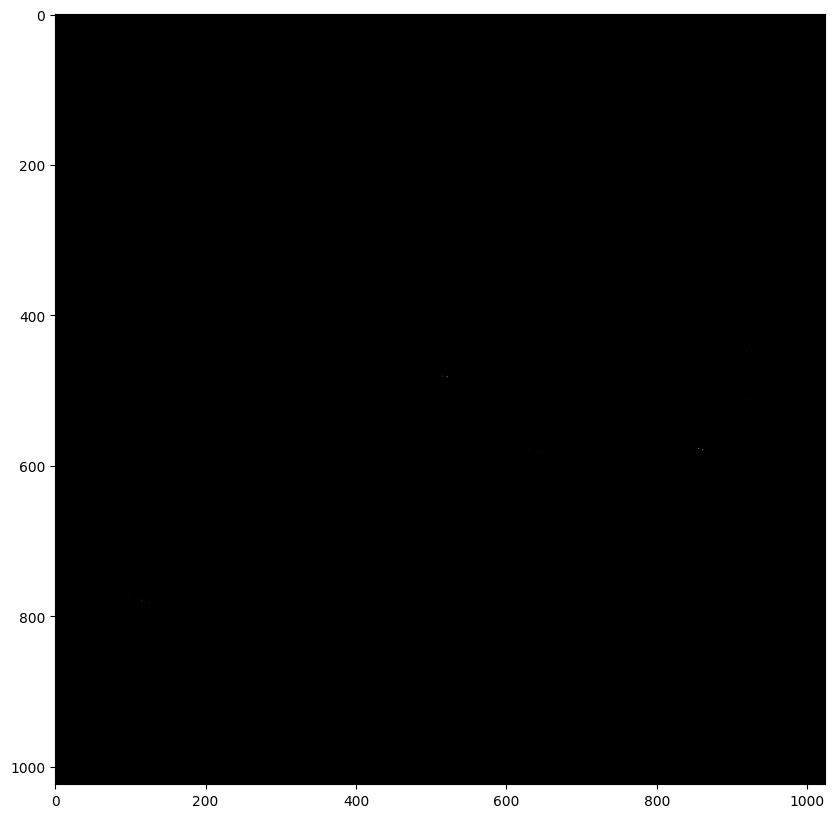

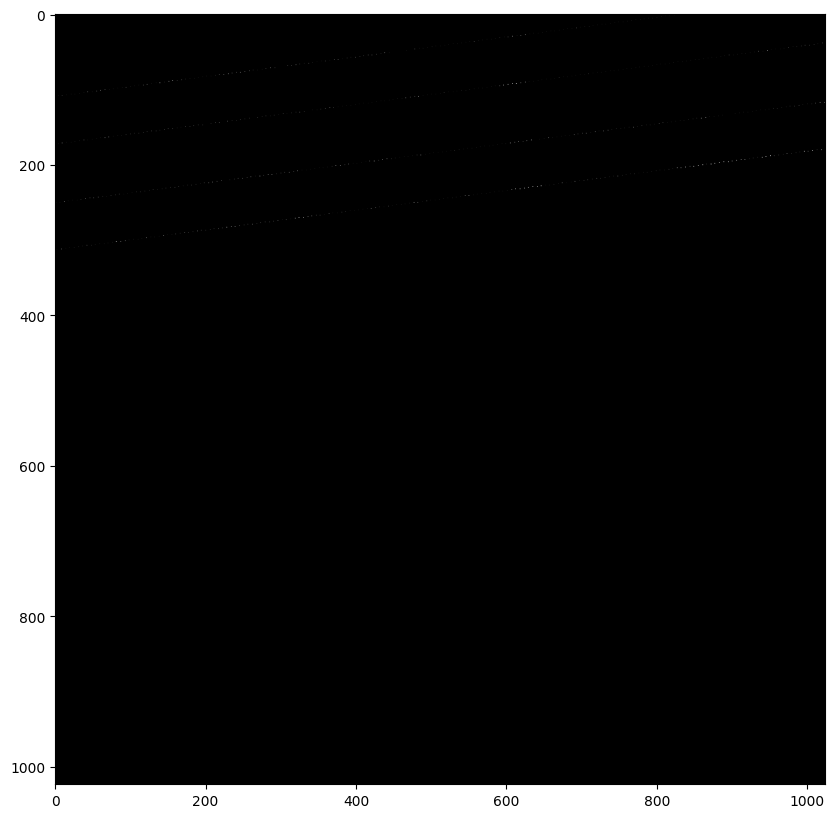

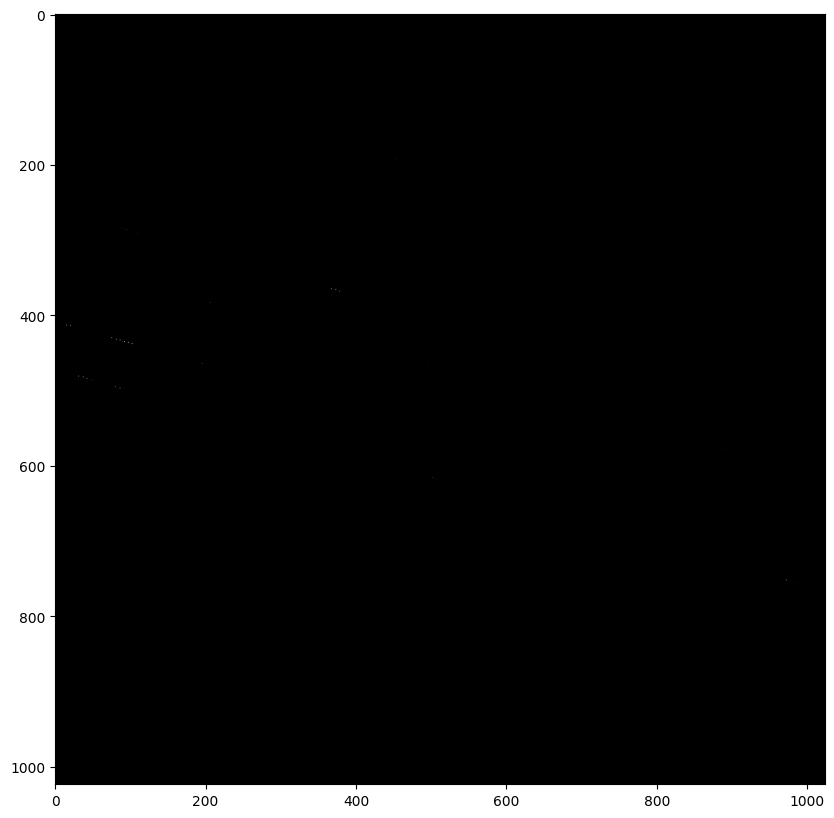

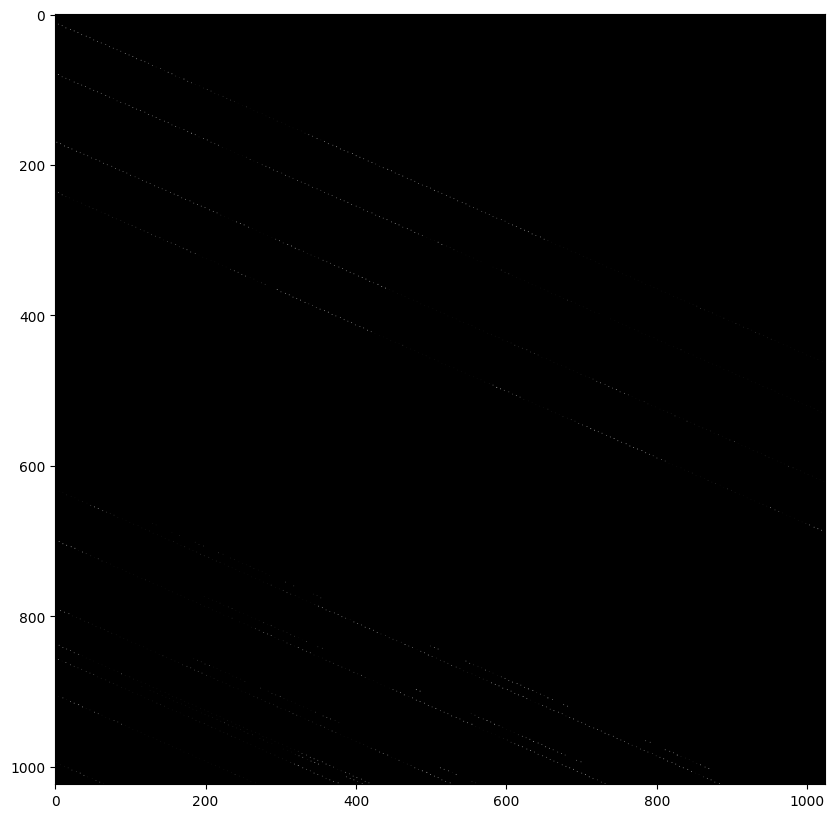

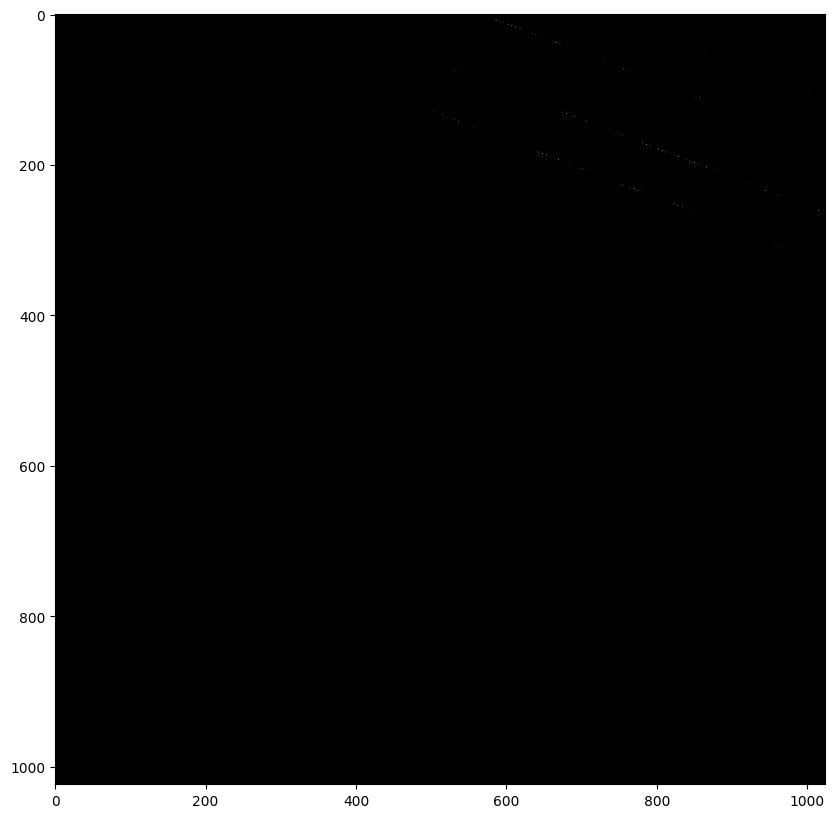

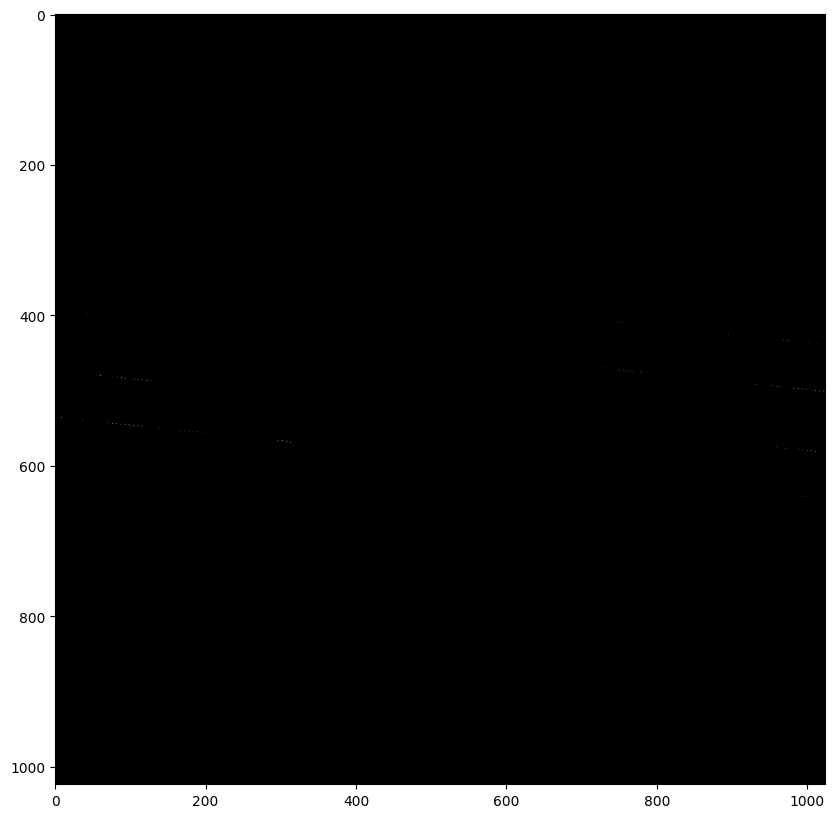

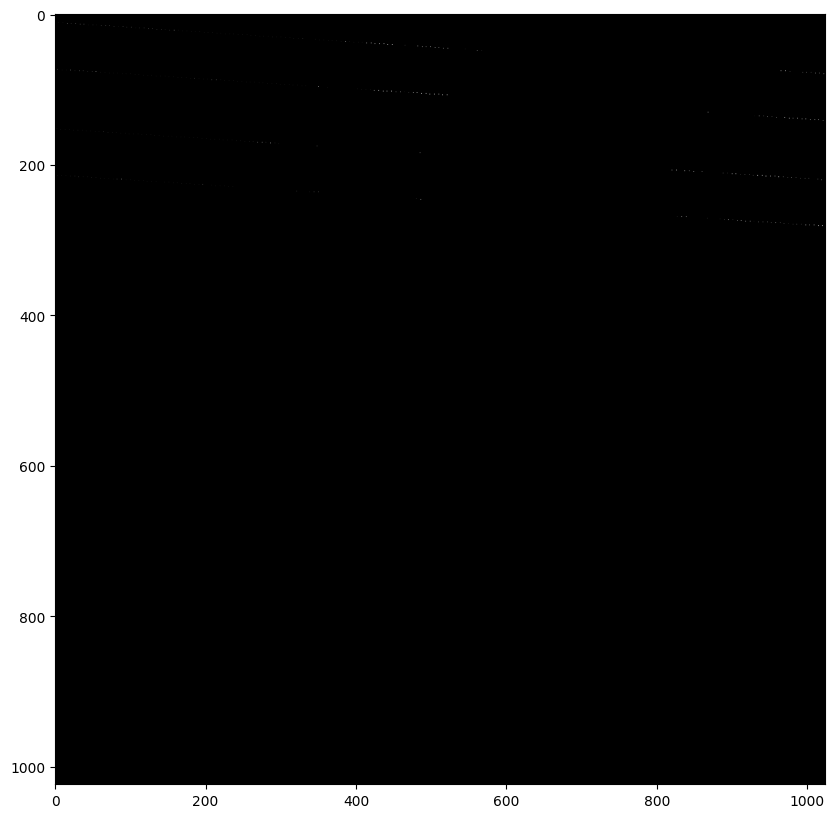

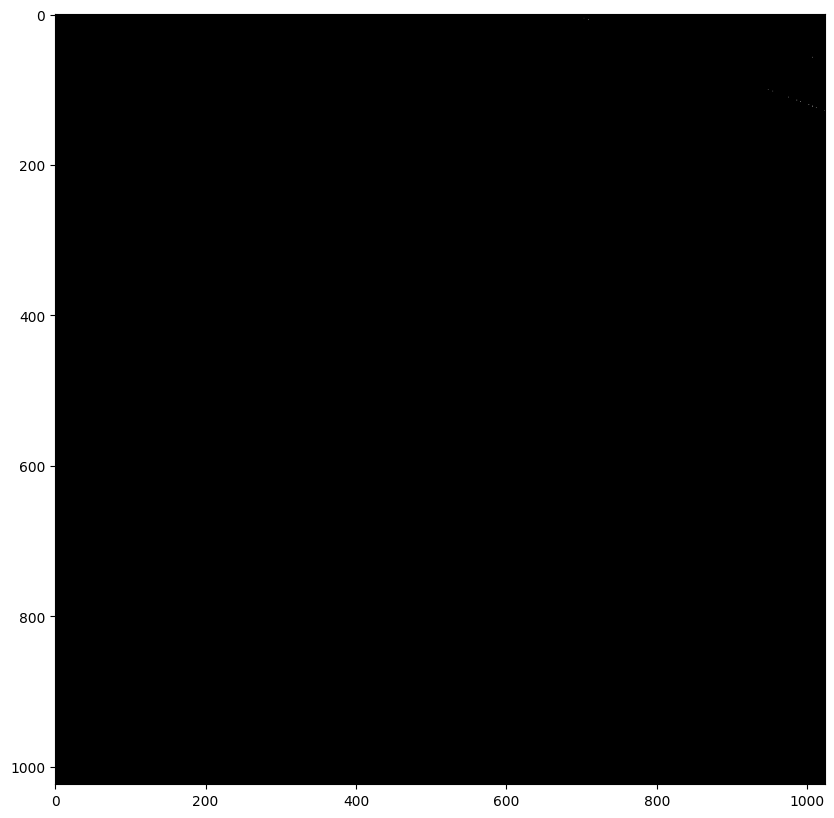

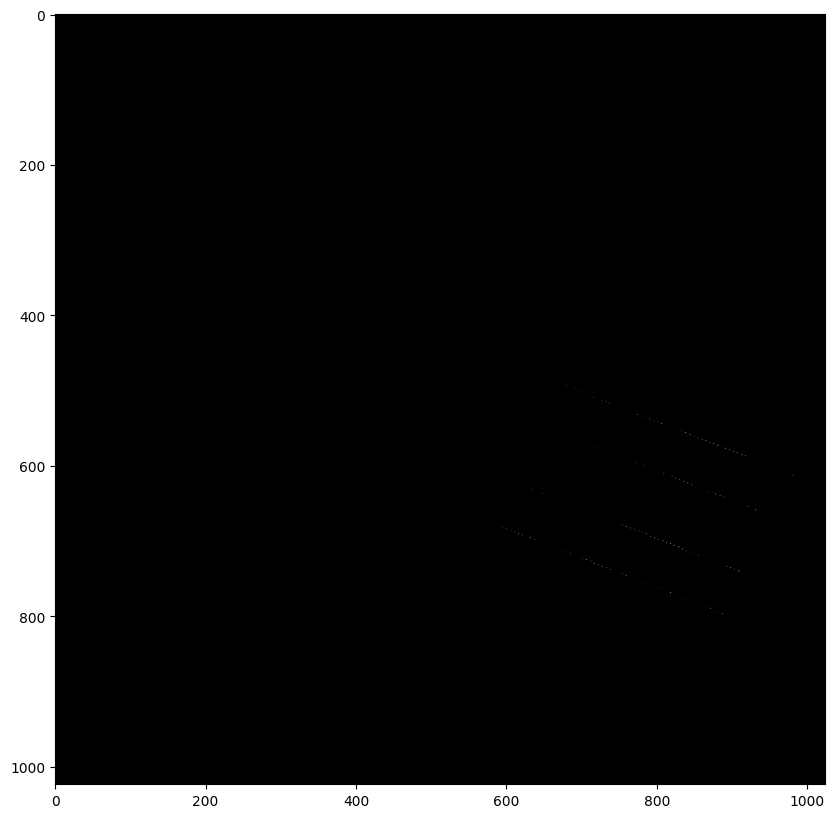

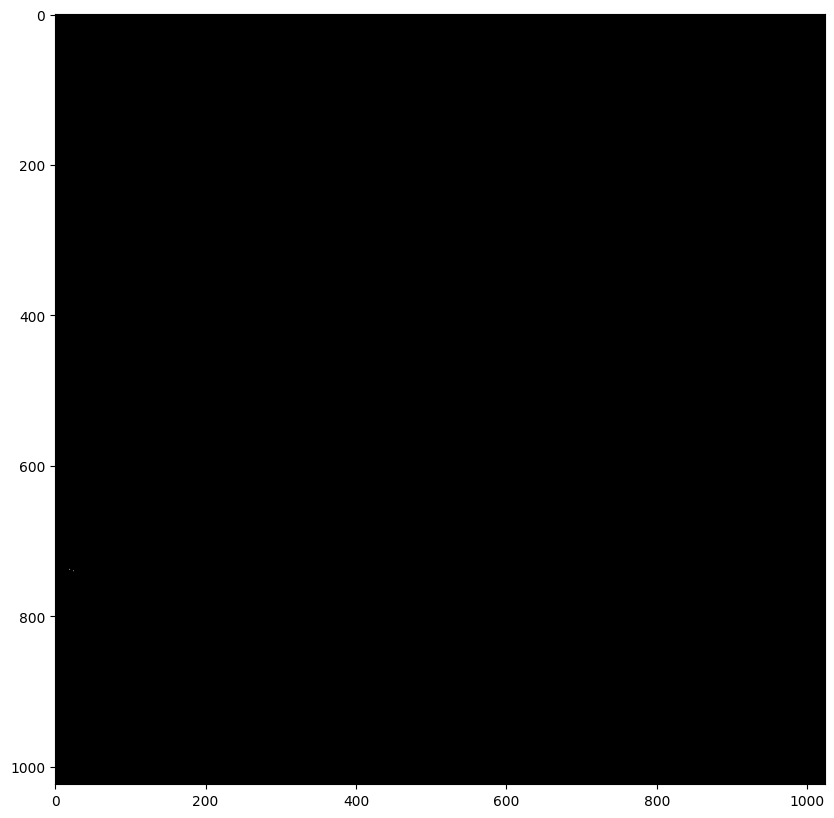

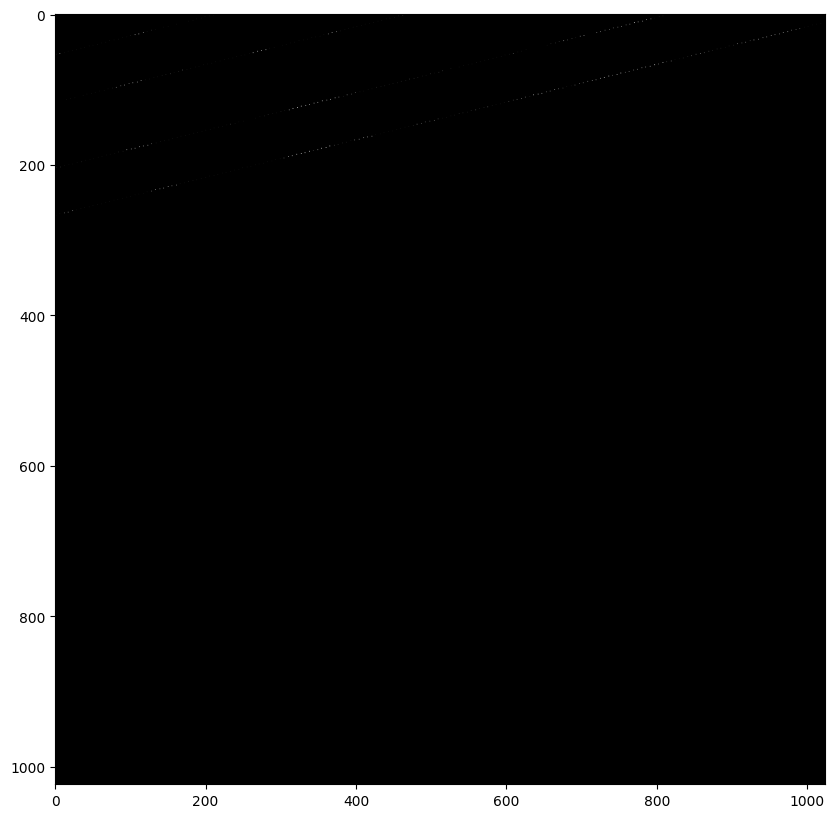

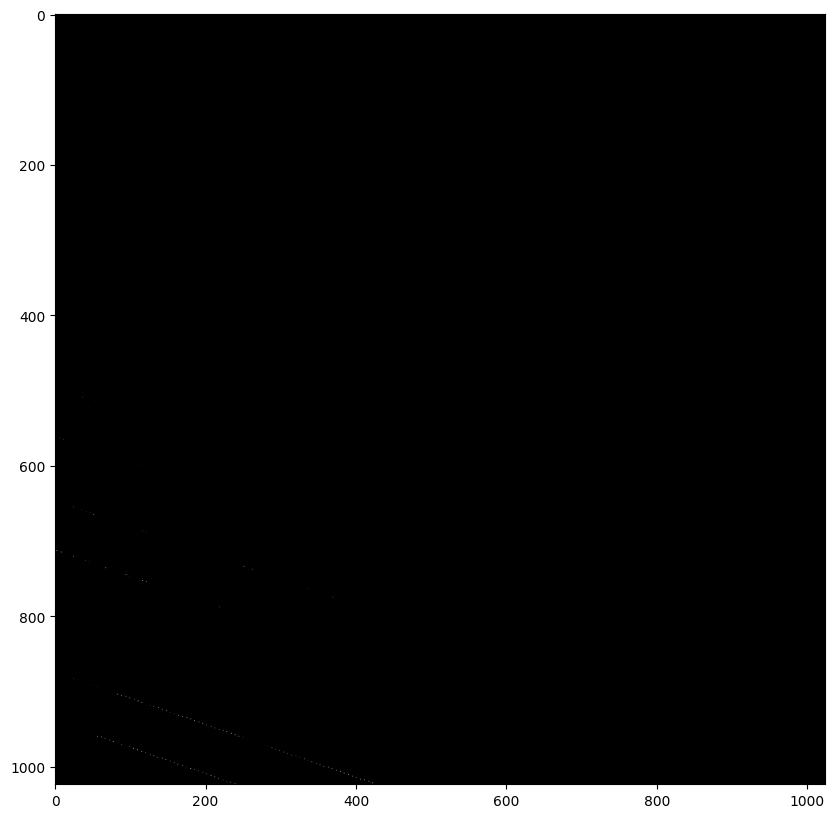

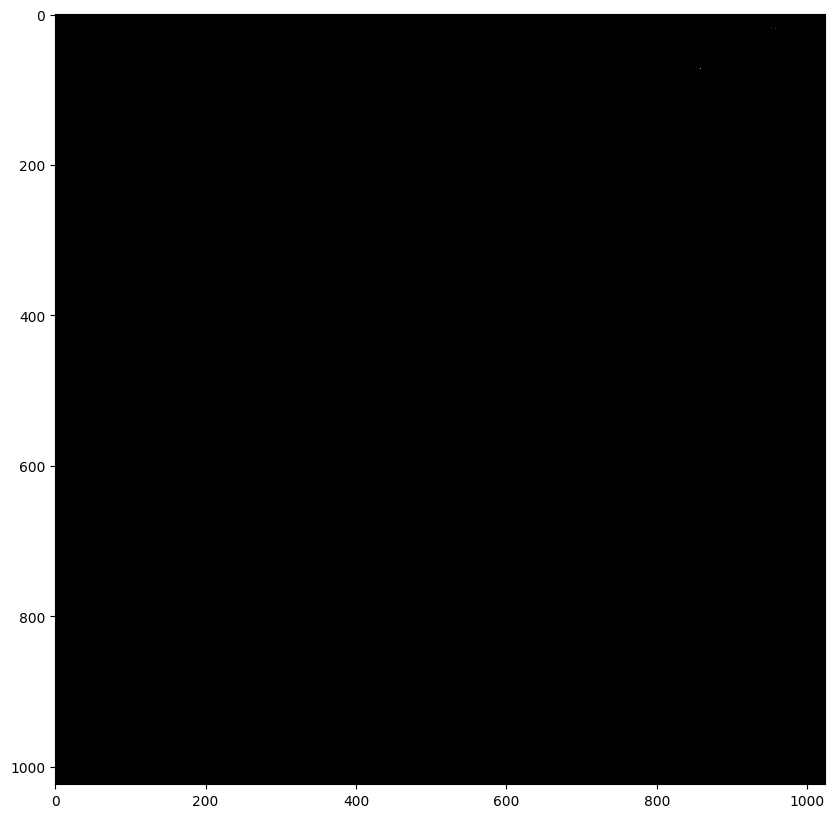

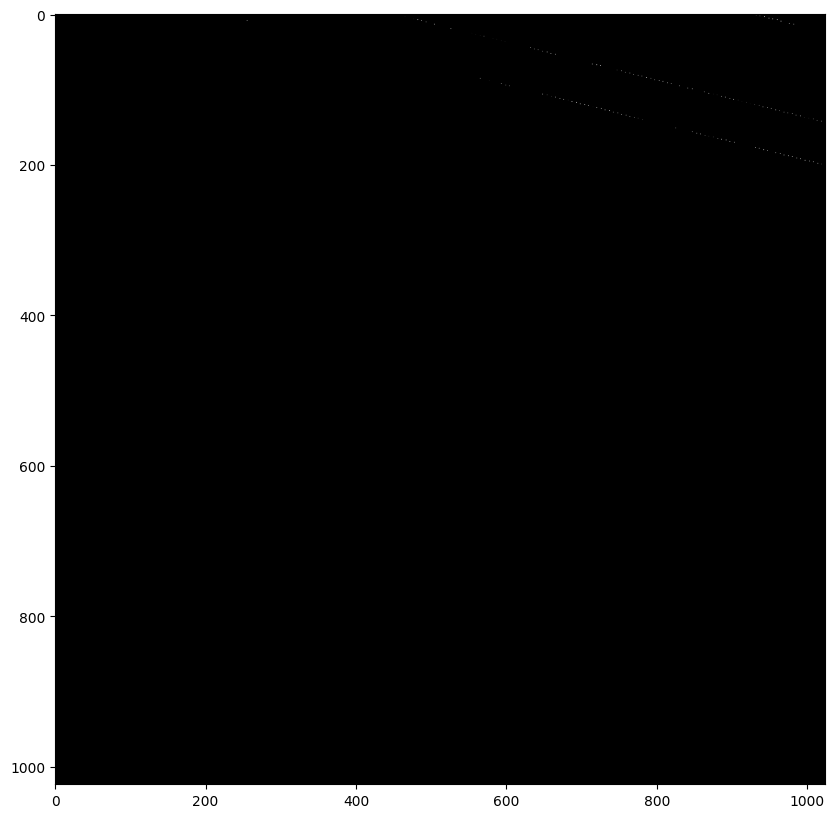

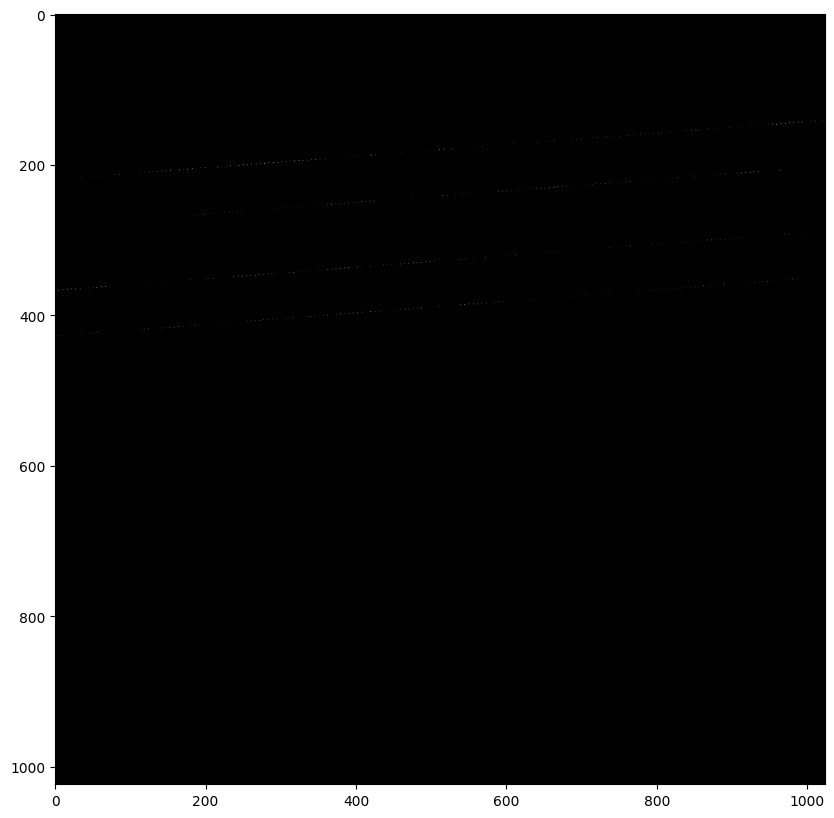

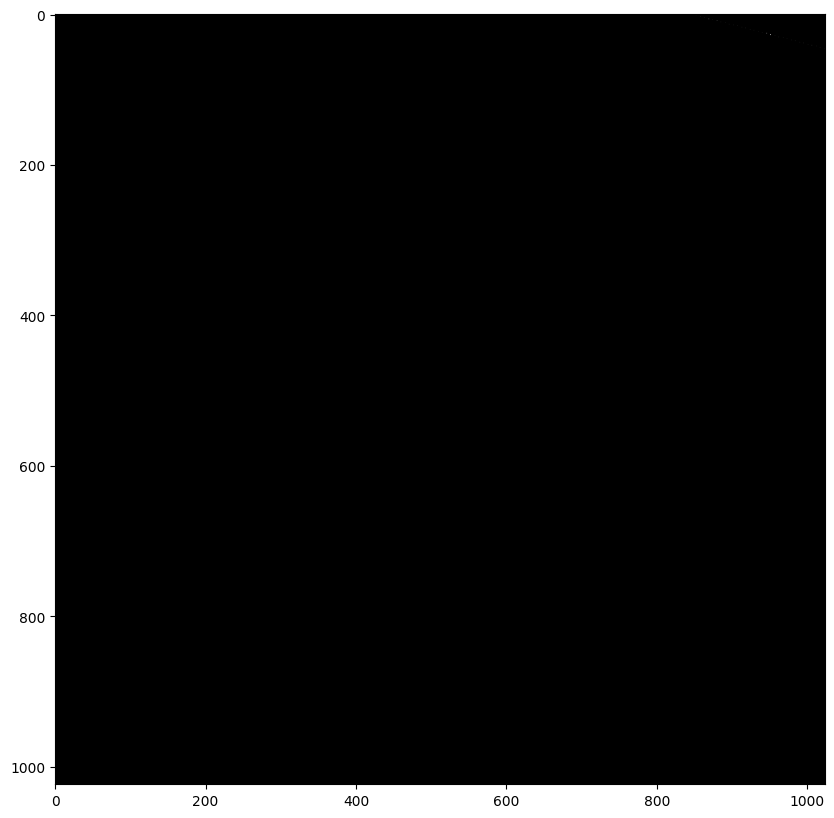

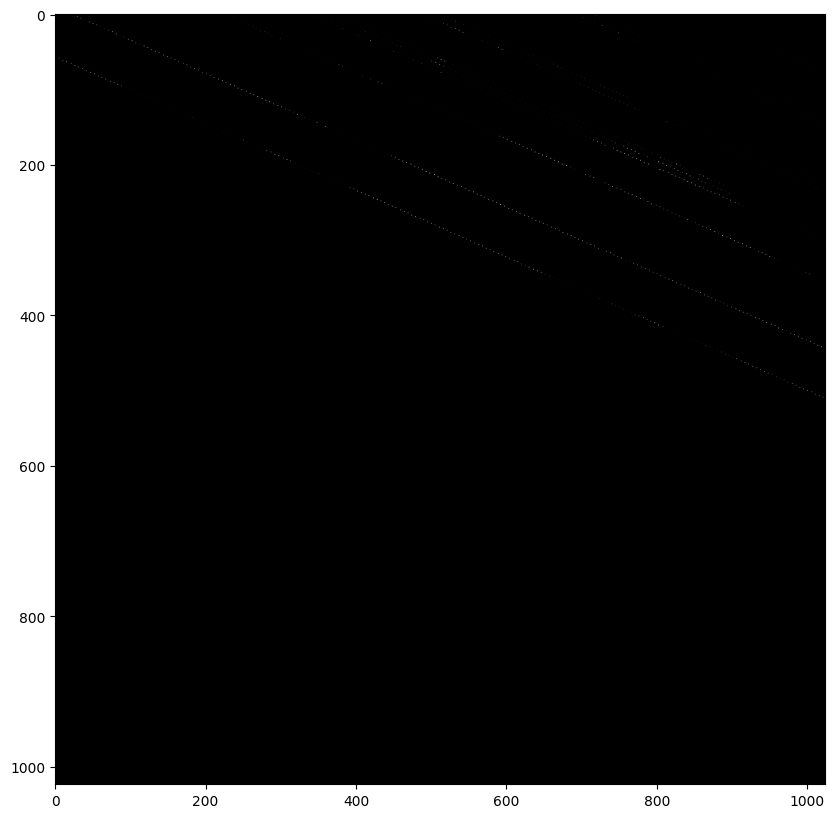

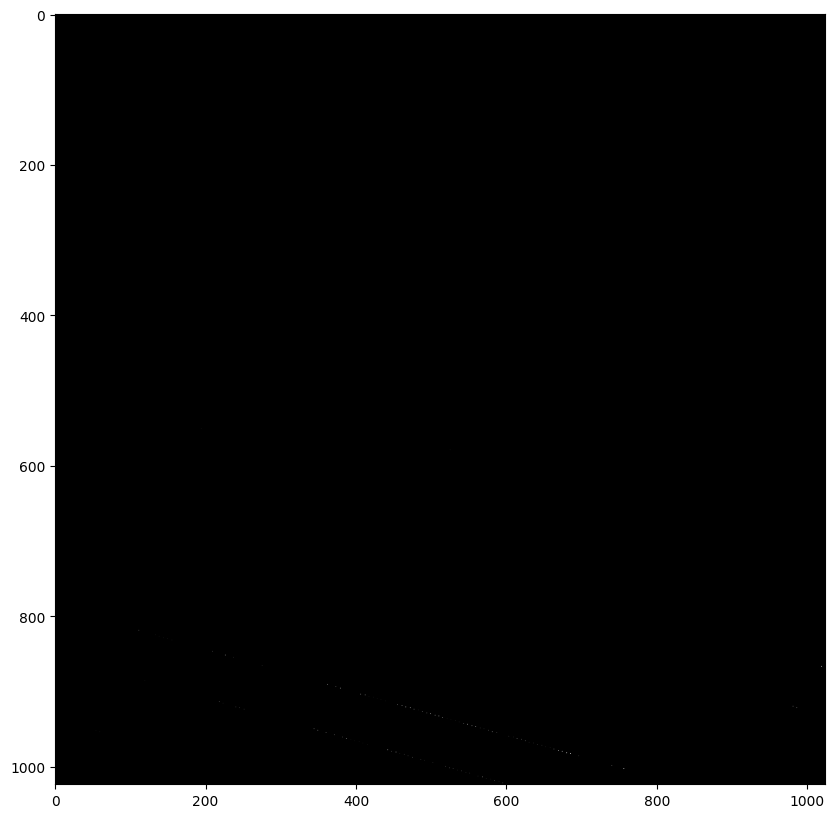

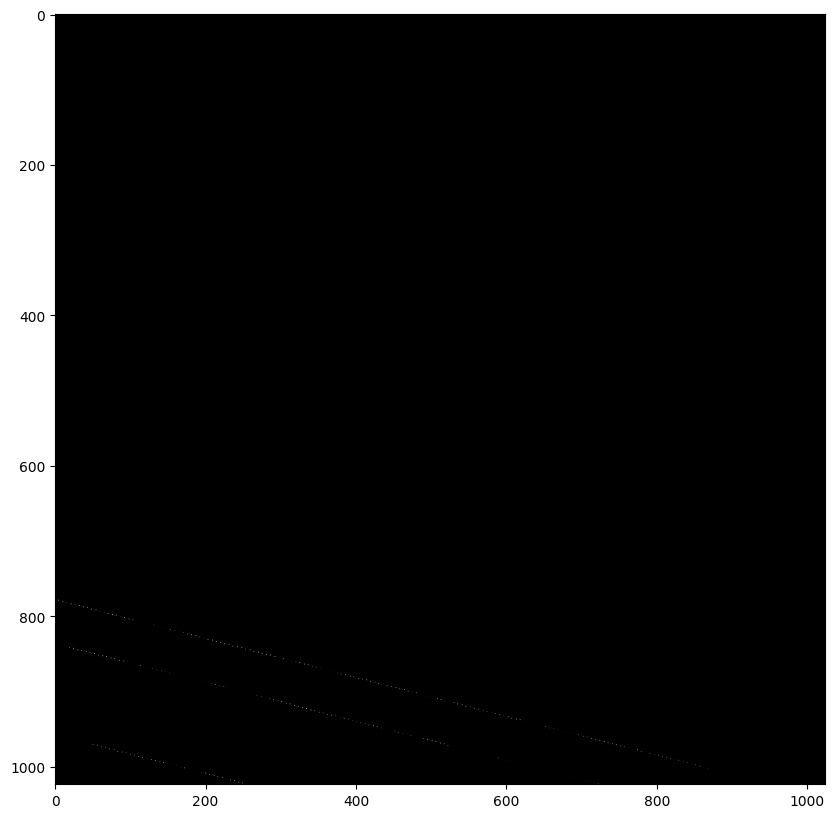

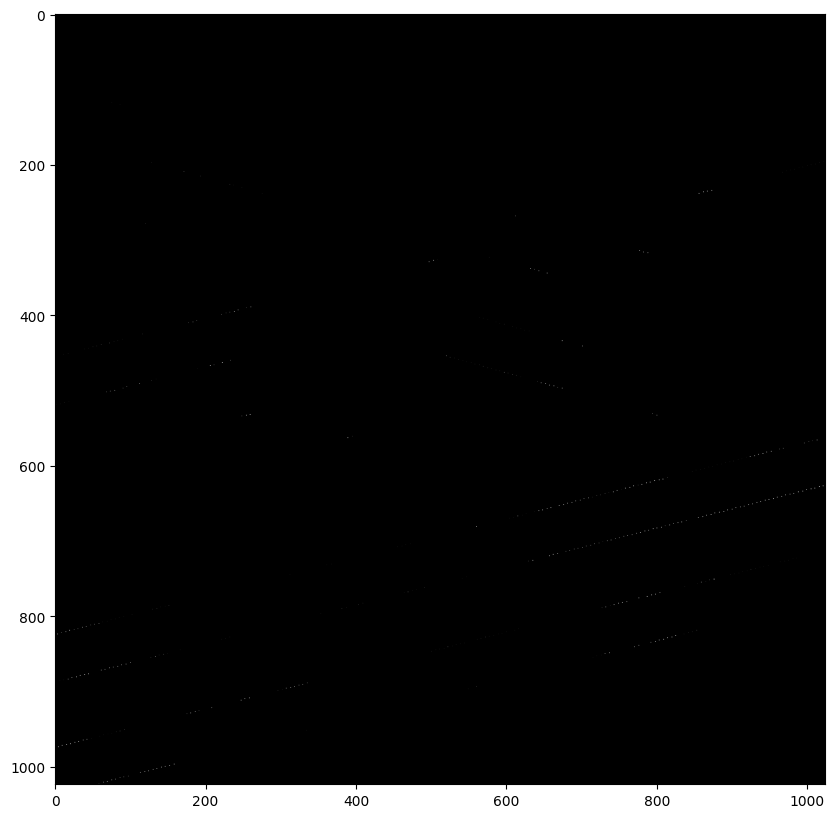

In [21]:
for i in range(40):
    plt.figure(figsize=(10, 10))
    plt.imshow(masks[i, 0]*255, cmap='gray')
    plt.show()